In [27]:
from dataset import QA
data = QA().data

<Axes: xlabel='extracted_answer_end', ylabel='Count'>

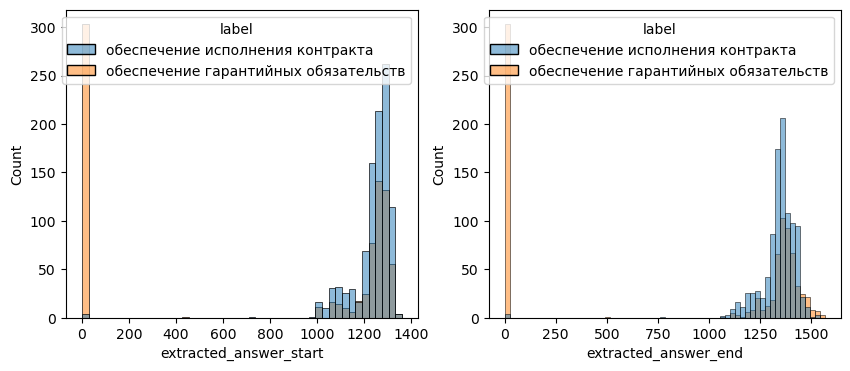

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data, x="extracted_answer_start", hue="label", ax=axs[0])
sns.histplot(data, x="extracted_answer_end", hue="label", ax=axs[1])

In [29]:
data.loc[
    (
        (data["extracted_answer_start"] == 0) |
        (data["extracted_answer_end"] == 0) 
    ), "extracted_text"
].value_counts()

    307
Name: extracted_text, dtype: int64

In [30]:
data = data.loc[
    ~(
        (data["extracted_answer_start"] == 0) |
        (data["extracted_answer_end"] == 0) 
    )
]

<Axes: xlabel='extracted_answer_end', ylabel='Count'>

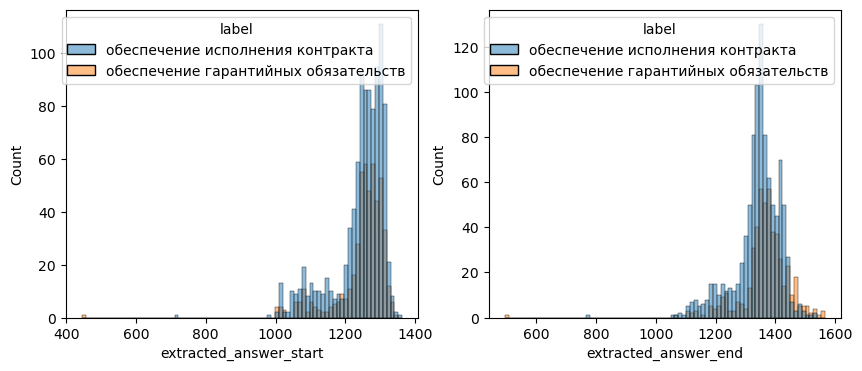

In [31]:
f, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data, x="extracted_answer_start", hue="label", ax=axs[0])
sns.histplot(data, x="extracted_answer_end", hue="label", ax=axs[1])

In [43]:
data.loc[data["extracted_answer_start"] < 800, ["label", "text", "extracted_text"]]

,label,text,extracted_text
465,обеспечение исполнения контракта,"Способ определения поставщика (подрядчика, исп...",Обеспечение исполнения контракта 5% от цены ко...
1068,обеспечение гарантийных обязательств,Лист1 Приложение № 7 к извещению График постав...,Обеспечение гарантийных обязательств (1% от НМЦК)


<Axes: xlabel='id', ylabel='extracted_answer_end'>

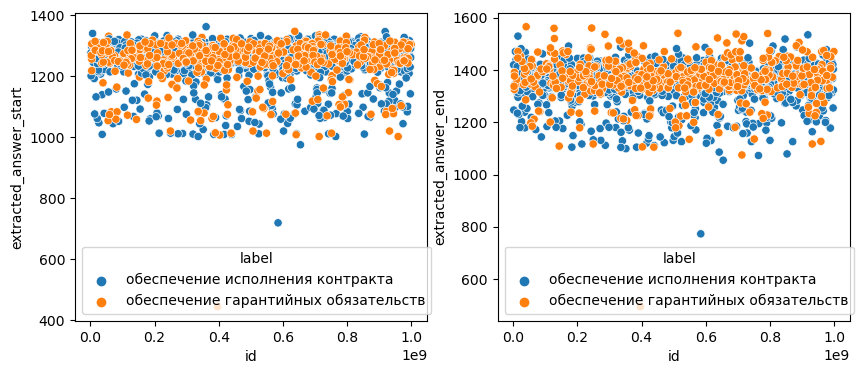

In [33]:
# possible temporal correlations.
f, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.scatterplot(
    data, x="id", y="extracted_answer_start", hue="label", ax=axs[0]
)
sns.scatterplot(
    data, x="id", y="extracted_answer_end", hue="label", ax=axs[1]
)

<Axes: xlabel='text', ylabel='Count'>

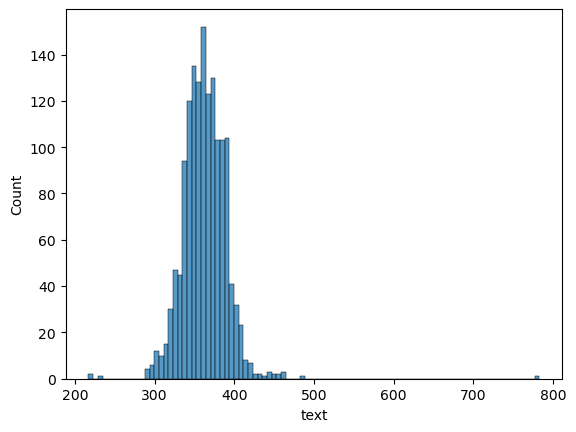

In [50]:
from nltk import word_tokenize
document_length = data["text"].map(lambda text: len(word_tokenize(text)))

sns.histplot(data=document_length)

<Axes: xlabel='extracted_text', ylabel='Count'>

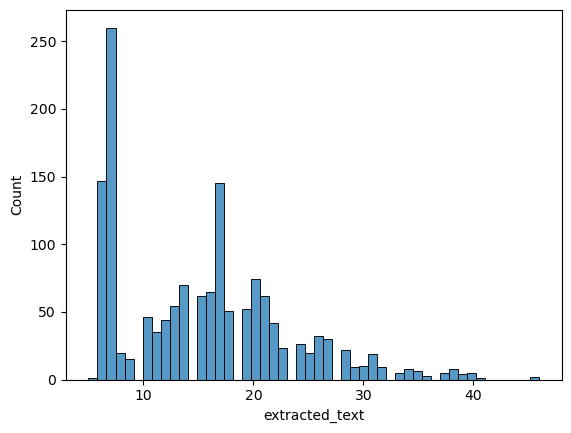

In [62]:
answer_length = data["extracted_text"].map(lambda text: len(word_tokenize(text)))
sns.histplot(data=answer_length, bins=50)